<a target="_blank" href="https://colab.research.google.com/github/rcabanasdepaz/ME-BigData/blob/main/JAGS/RegLineal_JAGS.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Regresión lineal con modelos jerárquicos (JAGS)

A continuación se muestra cómo aprender los pesos de una regresión lineal utilizando un modelo probabilístico jerárquico.


In [1]:
install.packages("R2OpenBUGS")
library(R2OpenBUGS)


system("sudo apt-get install -y jags") # Sólo para colab o sistemas Linux
install.packages("rjags")
library(rjags)


install.packages("coda")
library(coda)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘coda’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: coda

Linked to JAGS 4.3.2

Loaded modules: basemod,bugs

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




## Conjunto de datos

En primer lugar, muestreamos un conjunto de datos $\{x_i,y_i\}_{i=1}^{1000}$ siguiendo la expresión $y_i = 2x_i + 3 + \varepsilon_i$ con $\varepsilon_i\sim \mathcal{N}(0,2)$.

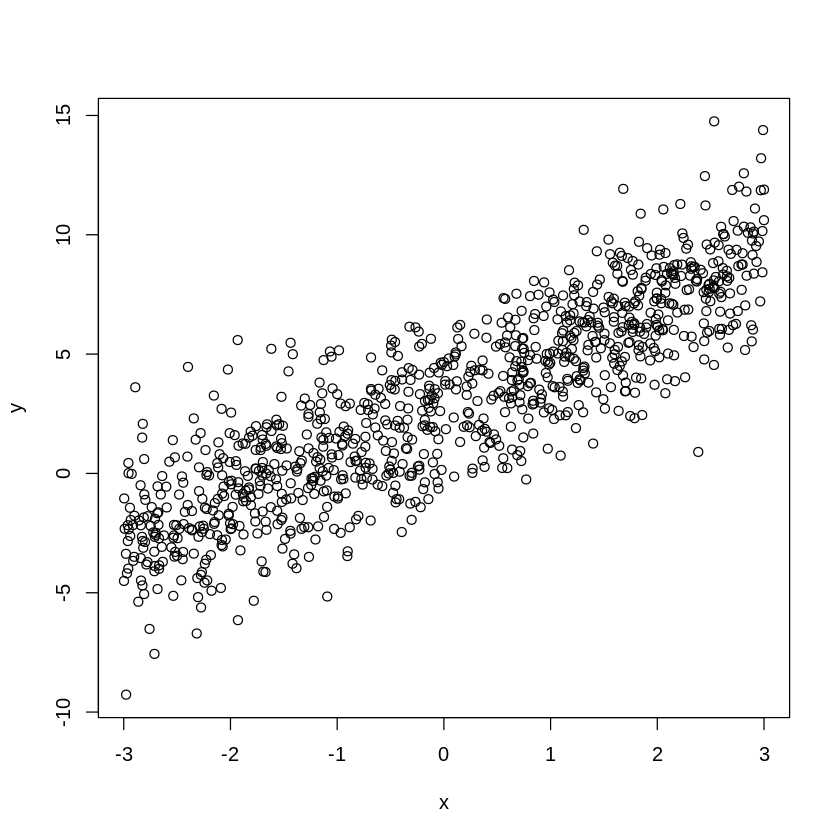

In [2]:
n=1000
x = runif(n,-3,3)
y = 2*x + 3 + rnorm(n,0,2)
plot(x,y)

df = data.frame(x=x,y=y)



## Modelo
### Definición

El una regresión lineal se puede definir como el siguiente modelo jerárquico.


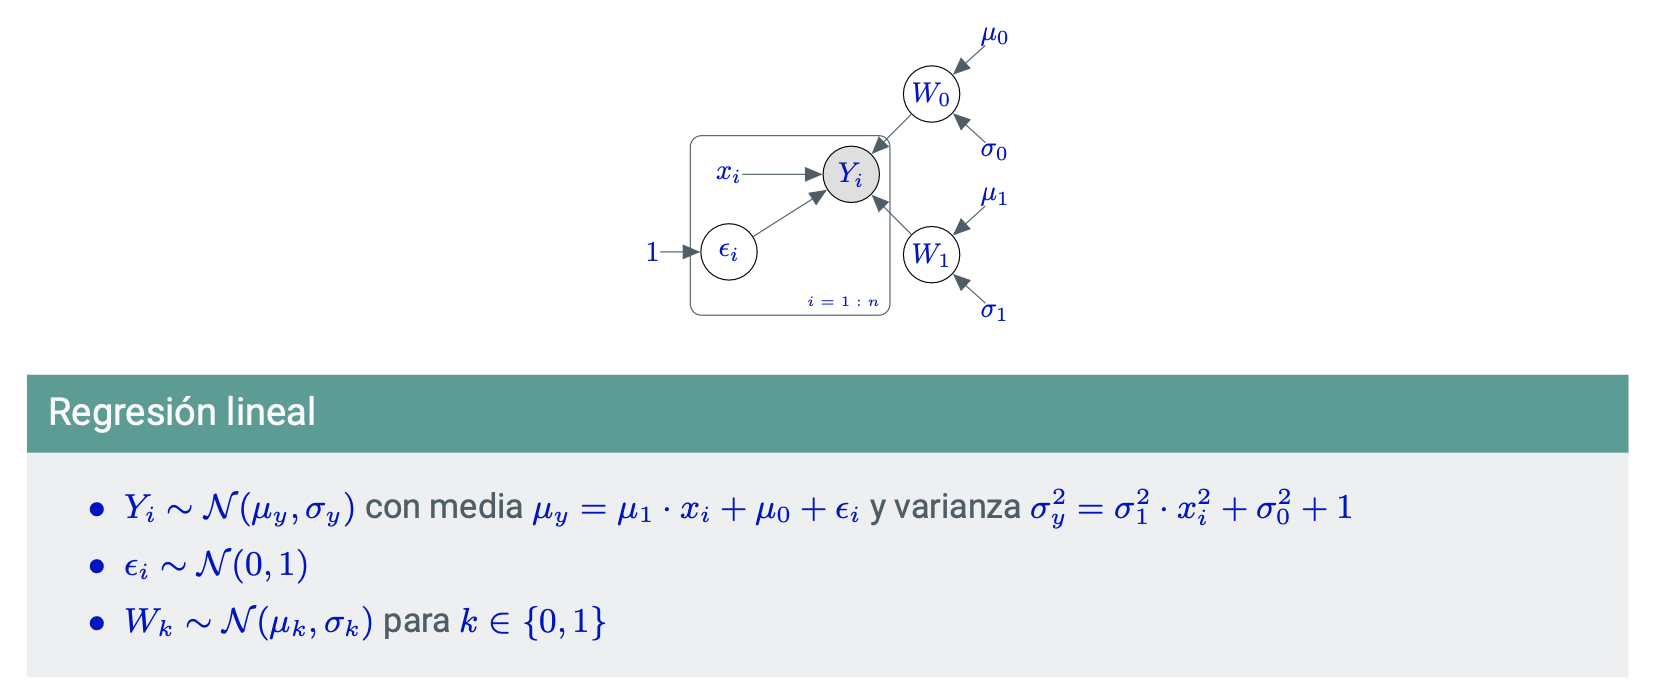

Podemos definir el modelo como una función:

In [3]:
# Un modelo en rjags es una función
mod = function(){
  # distribuciones a priori
  w0~dnorm(0,1)
  w1~dnorm(0,1)

  # verosimilitud
  for(i in 1:1000){
    epsilon[i]~dnorm(0,1)
    mu[i]<- w0 + x[i]*w1
    y[i]~dnorm(mu[i],1)

  }
}

### Inferencia

Puesto que JAGS es un software externo a R, para poder hacer inferencia hacer inferenc

In [4]:

# hay que guardar el modelo en un archivo
model.file="model.txt"
write.model(mod,model.file)

# compilamos el modelo
jmod = jags.model(file = model.file, data = df, inits = NULL, n.adapt = 1000)


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1000
   Unobserved stochastic nodes: 1002
   Total graph size: 5004

Initializing model



In [5]:
update(jmod, n.iter=1000, by=1)

In [6]:
samples = jags.samples(jmod,c("w0","w1"), 100)
samples

$w0
mcarray:
[1] 2.918456

Marginalizing over: iteration(100),chain(1) 

$w1
mcarray:
[1] 2.00763

Marginalizing over: iteration(100),chain(1) 


In [9]:
mu0 = mean(samples$w0)
mu1 = mean(samples$w1)


In [8]:
a1

[1] 2.00763

ERROR: ignored

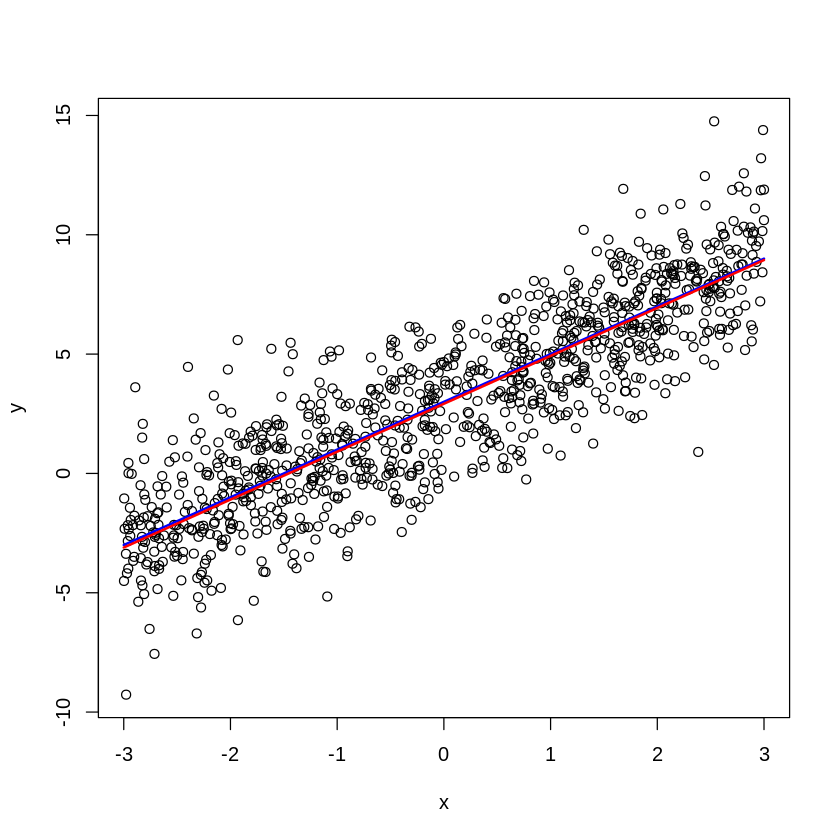

In [10]:
plot(x,y)
curve(2*x+3, from = -3, to = 3, add=T, col = 'blue', lwd=2)
curve(mu1*x+mu0, from = -3, to = 3, add=T, col = 'red', lwd=2)
linM = lm(y[1:M]~x[1:M])
curve(linM$coefficients[1]+linM$coefficients[2]*x, from = -3, to = 3, add=T, col = 'green', lwd=2)
legend(0, 10.5, legend= c('Original','Modelo Jerárquico.','Mínimos cuadrados'), col=c('blue','red','green'),lty=1, cex=0.8)



## Enlaces
- Para crear notebooks con código en R: https://colab.research.google.com/#create=true&language=r